### Data Collecting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#membuat data file ke DataFrame
df = pd.read_csv('goalkeeper1.csv', delimiter=';')
df

,id_player,player,nation,klub,age,competition,OPA,OPA/90
0,1,Alisson,Brazil,Liverpool,29,Premier League,89,"2,41"
1,2,Alphonse Aerola,France,West Ham,29,Premier League,1,"0,29"
2,3,Kepa Arrizabalaga,Spain,Chelsea,27,Premier League,52,"1,82"
3,4,Gavin Bazunu,Ireland,Southampton,20,Premier League,48,"1,50"
4,5,Asmir Begovic,Bosnia and Herzegovina,Everton,35,Premier League,0,"0,00"
...,...,...,...,...,...,...,...,...
161,163,Martin Turk,Slovenia,Sampdoria,18,SerieA,2,"0,50"
162,164,Samir Ujkani,Kosovo,Empoli,34,SerieA,0,"0,00"
163,165,Guglielmo Vicaro,Italy,Empoli,25,SerieA,22,"0,71"
164,166,Jeroen Zoet,Netherlands,Spezia,31,SerieA,6,"1,61"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_player    166 non-null    int64 
 1   player       166 non-null    object
 2   nation       166 non-null    object
 3   klub         166 non-null    object
 4   age          166 non-null    int64 
 5   competition  166 non-null    object
 6   OPA          166 non-null    int64 
 7   OPA/90       166 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.5+ KB


### Eksplorasi Data Analisis

In [3]:
# memeriksa dimensi data
import numpy as np
np.shape(df)

(166, 8)

In [4]:
df.isnull().any()

id_player      False
player         False
nation         False
klub           False
age            False
competition    False
OPA            False
OPA/90         False
dtype: bool

In [5]:
#Memeriksa Jenis Data setiap Variabel
df.dtypes

id_player       int64
player         object
nation         object
klub           object
age             int64
competition    object
OPA             int64
OPA/90         object
dtype: object

In [6]:
# Mengganti tanda koma menjadi titik
df['OPA/90'] = df['OPA/90'].str.replace(',', '.')

#Mengubah jenis data float pada variabel OPA/90
df["OPA/90"] = df["OPA/90"].astype('float')

In [7]:
df.dtypes

id_player        int64
player          object
nation          object
klub            object
age              int64
competition     object
OPA              int64
OPA/90         float64
dtype: object

In [8]:
df.describe()

,id_player,age,OPA,OPA/90
count,166.000000,166.000000,166.000000,166.000000
mean,84.265060,28.831325,20.807229,1.079940
std,48.377326,4.882422,20.705706,0.641214
min,1.000000,18.000000,0.000000,0.000000
25%,43.250000,25.000000,3.250000,0.695000
50%,84.500000,29.000000,16.500000,1.040000
75%,125.750000,32.000000,32.000000,1.420000
max,167.000000,41.000000,121.000000,3.560000


### Klasterisasi OPA/90

In [9]:
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

warnings.filterwarnings(action='ignore')

In [10]:
df1 = df.loc[:, ['player', 'OPA/90', 'age']]
df1

,player,OPA/90,age
0,Alisson,2.41,29
1,Alphonse Aerola,0.29,29
2,Kepa Arrizabalaga,1.82,27
3,Gavin Bazunu,1.50,20
4,Asmir Begovic,0.00,35
...,...,...,...
161,Martin Turk,0.50,18
162,Samir Ujkani,0.00,34
163,Guglielmo Vicaro,0.71,25
164,Jeroen Zoet,1.61,31


In [12]:
# mengambil 2 data yang akan diklasterisasi
data = df1.loc[:, ['age', 'OPA/90']]
data.head(2)

,age,OPA/90
0,29,2.41
1,29,0.29


In [13]:
# convert to numpy array
X = data.values
X

array([[29.  ,  2.41],
       [29.  ,  0.29],
       [27.  ,  1.82],
       [20.  ,  1.5 ],
       [35.  ,  0.  ],
       [29.  ,  0.5 ],
       [33.  ,  0.  ],
       [28.  ,  0.94],
       [37.  ,  0.72],
       [34.  ,  1.19],
       [31.  ,  0.84],
       [35.  ,  0.96],
       [25.  ,  1.5 ],
       [35.  ,  0.66],
       [25.  ,  0.5 ],
       [29.  ,  1.22],
       [23.  ,  0.  ],
       [30.  ,  1.28],
       [35.  ,  1.18],
       [29.  ,  2.09],
       [32.  ,  1.17],
       [30.  ,  1.16],
       [22.  ,  1.94],
       [35.  ,  0.53],
       [33.  ,  0.94],
       [32.  ,  0.96],
       [29.  ,  2.33],
       [28.  ,  1.41],
       [30.  ,  2.04],
       [24.  ,  1.13],
       [26.  ,  1.42],
       [32.  ,  0.75],
       [25.  ,  1.  ],
       [29.  ,  0.78],
       [24.  ,  0.57],
       [31.  ,  1.27],
       [23.  ,  0.43],
       [29.  ,  1.62],
       [18.  ,  1.5 ],
       [21.  ,  1.33],
       [33.  ,  1.7 ],
       [30.  ,  0.56],
       [31.  ,  1.63],
       [39.

In [14]:
# kalkulasi WCSS
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [15]:
# implementasi kmeans

def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
    # untuk setiap pengamatan
    for i, row in enumerate(X):
      mn_dist = float('inf')
        # dist titik dari semua centroid
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
        # store closest centroid
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx
    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster

In [16]:
# mencari K value dengan metode Elbow

cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

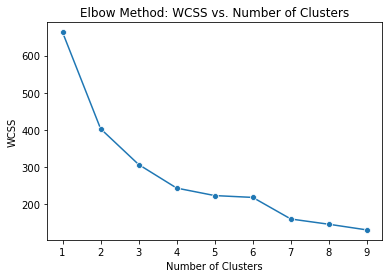

In [17]:
import seaborn as sns

sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method: WCSS vs. Number of Clusters')
plt.show()

In [18]:
# membuat klaster
k = 3
centroids, cluster = kmeans(X, k)

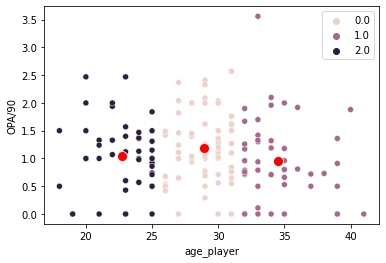

In [20]:
# Visualisasi Klaster
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster)
sns.scatterplot(x=centroids[:,0], y=centroids[:, 1], s=100, color='red')
plt.xlabel('age_player')
plt.ylabel('OPA/90')
plt.show()

In [ ]:
df1['cluster']

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create and fit the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as desired

# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [22]:
kmeans.cluster_centers_

array([[0.25217391, 0.26994382],
       [0.53352985, 0.45329461],
       [0.67160037, 0.1577815 ]])

<AxesSubplot:xlabel='OPA/90', ylabel='age'>

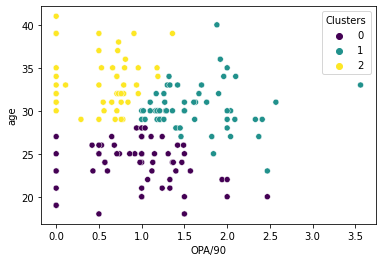

In [23]:
df1['Clusters'] = kmeans.labels_
sns.scatterplot(x="OPA/90", y="age",hue = 'Clusters',  data=df1 ,palette='viridis')

In [ ]:
df1

In [ ]:
# Filter data for Cluster 0 with Tackles_att3rd_per90 > 0.60
filtered_data = df1[(df1['Clusters'] == 1) & (df1['OPA/90'] > 2.0)]
plt.figure(figsize=(20, 9))

# Create scatter plot with filtered player names as labels
plt.scatter(filtered_data['OPA/90'], filtered_data.index, color="red")

for i, player in enumerate(filtered_data['player']):
    x_value = filtered_data.loc[filtered_data['player'] == player, "OPA/90"].values[0]
    plt.annotate(player, (x_value, filtered_data.index[i]), xytext=(5, 14), textcoords='offset points', ha='left', va='center')

# Set labels and title
plt.xlabel("OPA/90")
plt.ylabel("id_player")
plt.title("OPA/90 Highest")

# Adjust spacing for player names
plt.subplots_adjust(left=0.25)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, labels)

In [ ]:
print("Nilai silhouette:", silhouette_avg)